In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import babet as bb

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-11', '2023-10-13', '2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

# Results from all methods

In [ ]:
stats = [{'med': 16.8, 'q1': -17.0, 'q3': 60.3, 'whislo' : 0, 'whishi': 0},  # ERA5 analogues
        #  {},  # RACMO analogues
         {'med': 10.34, 'q1': 6.38, 'q3': 13.09, 'whislo' : 0, 'whishi': 0},  # PGW past
         {'med': 10.99, 'q1': 3.85, 'q3': 21.13, 'whislo' : 0, 'whishi': 0},  # PGW FUT1
         {'med': 9.55, 'q1': 4.63, 'q3': 16.68, 'whislo' : 0, 'whishi': 0},  # PGW FUT2
         {'med': -25.2, 'q1': -41.6, 'q3': -8.7, 'whislo' : 0, 'whishi': 0},  # FBA IFS, past, 15
         {'med': 46.5, 'q1': 13.3, 'q3': 84.6, 'whislo' : 0, 'whishi': 0},  # FBA IFS, fut, 15
         {'med': 13.9, 'q1': 10.1, 'q3': 17.6, 'whislo' : 0, 'whishi': 0},  # FBA IFS, all, 17
         {'med': 12.9, 'q1': 12.9, 'q3': 12.9, 'whislo' : 0, 'whishi': 0},  # FBA ACCESS, future
         {'med': -8.7, 'q1': -8.7, 'q3': -8.7, 'whislo' : 0, 'whishi': 0},  # FBA ACCESS, past
        #  {}   # Probabilistic
]

Text(0, 0.5, 'Precipitation scaling (%/K)')

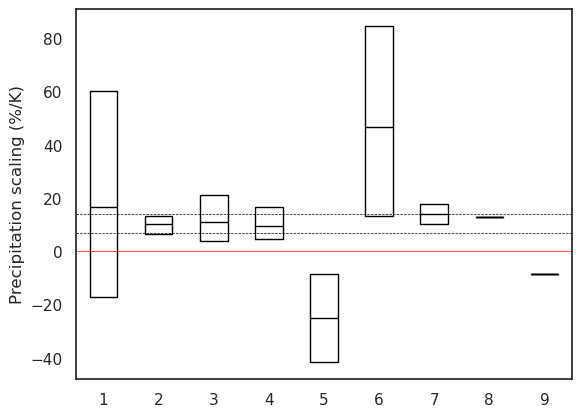

In [28]:
# https://stackoverflow.com/questions/54033076/can-i-generate-a-boxplot-without-a-dataset-and-only-having-the-relevant-values

# Main plot
_, ax = plt.subplots();
ax.bxp(stats, showfliers=False, 
       showcaps=False, 
       whiskerprops={'linestyle': ''}, 
       medianprops={'linestyle': '-', 'color': 'black'});

# Horizontal line at 7 %/K and 14 %/K and 0
plt.axhline(y=7, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=14, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='-', linewidth=0.5)

# Plot settings
plt.ylabel("Precipitation scaling (%/K)")